# Homework Assignment Number One

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Section 1: Police killings

In [4]:
killings = pd.read_csv('../data/police-killings.csv', index_col=[0],encoding = "ISO-8859-1")
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- lawenforcementagency -> agency
- raceethnicity -> race

In [7]:
killings.rename(columns = {"lawenforcementagency" : "agency","raceethnicity" : "race"}, inplace=True)
killings.head()

,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 2. Show the count of missing values in each column

In [10]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 14 columns):
name             467 non-null object
age              467 non-null int64
gender           467 non-null object
race             467 non-null object
month            467 non-null object
day              467 non-null int64
year             467 non-null int64
streetaddress    463 non-null object
city             467 non-null object
state            467 non-null object
agency           467 non-null object
cause            467 non-null object
armed            467 non-null object
county_income    467 non-null int64
dtypes: int64(4), object(10)
memory usage: 54.7+ KB


In [9]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null value in the dataframe with the string "unknown"

In [11]:
killings.streetaddress.fillna("unknown",inplace = True)

In [12]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 4. How many killings were there in March and April?

In [19]:
killings.month.apply(lambda x: "March" in x or "April" in x).sum()

210

### 5. How many male and how many female victims are there?

In [47]:
killings.groupby(by = "gender")["gender"].count()

gender
Female     22
Male      445
Name: gender, dtype: int64

### 6. How many killings were of unarmed people?

In [57]:
killings.armed.apply(lambda x: "No" != x).sum()

365

### 7. What percentage of all killings were unarmed?

In [60]:
killings.armed.apply(lambda x: "No" != x).sum()*100.00/killings["name"].count()

78.158458244111344

### 8. What are the 5 states with the most killings?

In [79]:
test = killings.groupby(by = "state")["state"].count()
test.sort_values(ascending=False).head() 

state
CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

### 9. Show a value counts of deaths for each race

In [85]:
killings.groupby(by = "race")["race"].count()

race
Asian/Pacific Islander     10
Black                     135
Hispanic/Latino            67
Native American             4
Unknown                    15
White                     236
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

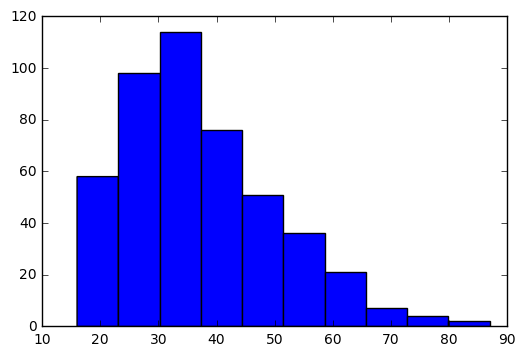

In [87]:
plt.hist(killings["age"]);

### 11. Show histogram of ages for each race

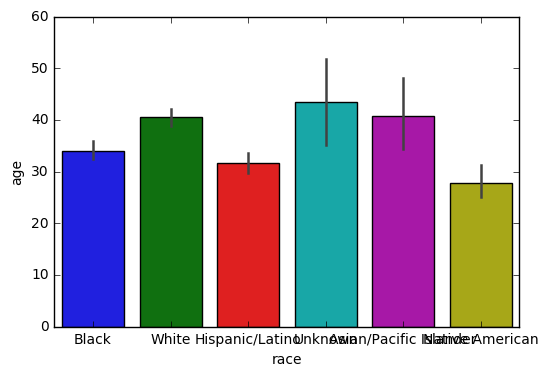

In [103]:
sns.barplot(x="race",y="age",data = killings); 

### 12. What is the average age of death by race?

In [115]:
killings.groupby(by = "race")["race","age"].mean()

,age
race,
Asian/Pacific Islander,40.800000
Black,34.044444
Hispanic/Latino,31.716418
Native American,27.750000
Unknown,43.533333
White,40.466102


### 13. Show a bar chart with counts of deaths every month

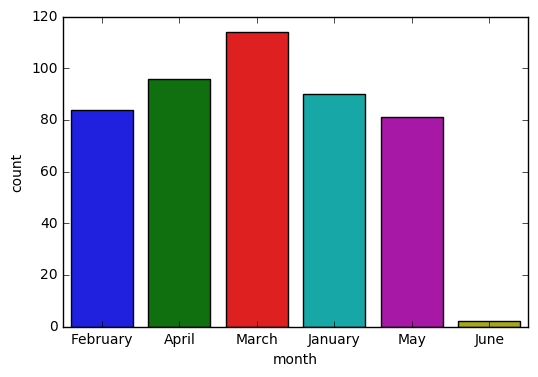

In [129]:
sns.countplot(x = "month", data= killings)

## Section 2: College Majors

In [138]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [139]:
cols = ["Employed_full_time_year_round","Major_code"]
cols

['Employed_full_time_year_round', 'Major_code']

In [140]:
majors.drop(cols,axis=1,inplace=True)


In [141]:
majors.head()

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


### 2. Show the count of missing values in each column

In [150]:
majors.isnull().sum()

Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [144]:
majors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 9 columns):
Major                173 non-null object
Major_category       173 non-null object
Total                173 non-null int64
Employed             173 non-null int64
Unemployed           173 non-null int64
Unemployment_rate    173 non-null float64
Median               173 non-null int64
P25th                173 non-null int64
P75th                173 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 13.5+ KB


### 3. What are the top 10 highest paying majors?

In [157]:
majors.Major.nunique()

173

In [172]:
t2 = majors.sort_values(by="Total",ascending = False).head(10)
cols2 = ["Major","Total"]
t2[cols2]

,Major,Total
161,BUSINESS MANAGEMENT AND ADMINISTRATION,3123510
158,GENERAL BUSINESS,2148712
159,ACCOUNTING,1779219
153,NURSING,1769892
114,PSYCHOLOGY,1484075
28,ELEMENTARY EDUCATION,1446701
25,GENERAL EDUCATION,1438867
164,MARKETING AND MARKETING RESEARCH,1114624
73,ENGLISH LANGUAGE AND LITERATURE,1098647
13,COMMUNICATIONS,987676


### 4. Plot the data from the last question in a bar chart, include proper title, and labels


In [184]:
import matplotlib.pyplot as plt

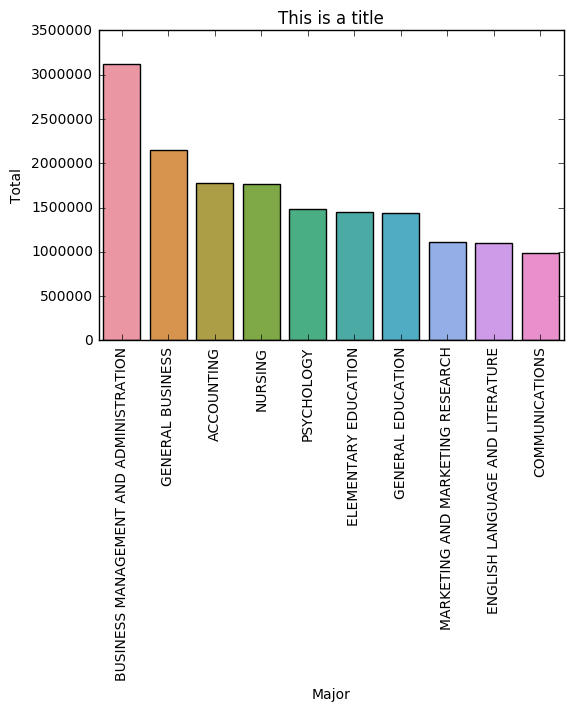

In [192]:
plt.title("This is a title")
sns.barplot(x="Major",y="Total",data = t2)
plt.xticks(rotation= "vertical");

### 5. What is the average median salary for each major category?

In [193]:
majors.columns

Index(['Major', 'Major_category', 'Total', 'Employed', 'Unemployed',
       'Unemployment_rate', 'Median', 'P25th', 'P75th'],
      dtype='object')

In [195]:
majors.groupby(by="Major_category")["Major_category","Median"].mean()

,Median
Major_category,
Agriculture & Natural Resources,55000.000000
Arts,43525.000000
Biology & Life Science,50821.428571
Business,60615.384615
Communications & Journalism,49500.000000
Computers & Mathematics,66272.727273
Education,43831.250000
Engineering,77758.620690
Health,56458.333333


### 6. Visualize only the top 5 paying major categories

In [200]:
d2 = majors.groupby(by="Major_category").Total.sum()
d2.sort_values(ascending = False).head()

Major_category
Business                     9858741
Education                    4700118
Humanities & Liberal Arts    3738335
Engineering                  3576013
Health                       2950859
Name: Total, dtype: int64

### 7. Plot a histogram of the distribution of median salaries

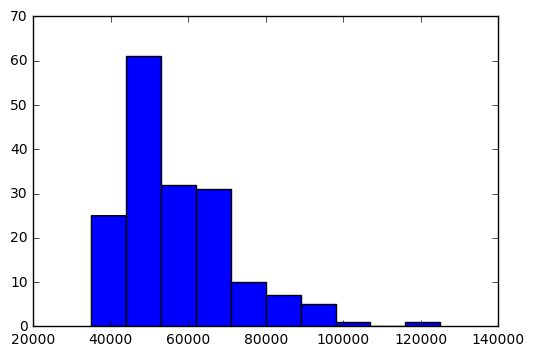

In [204]:
plt.hist(majors["Median"]);

### 8. Plot a histogram of the distribution of median salaries by major category

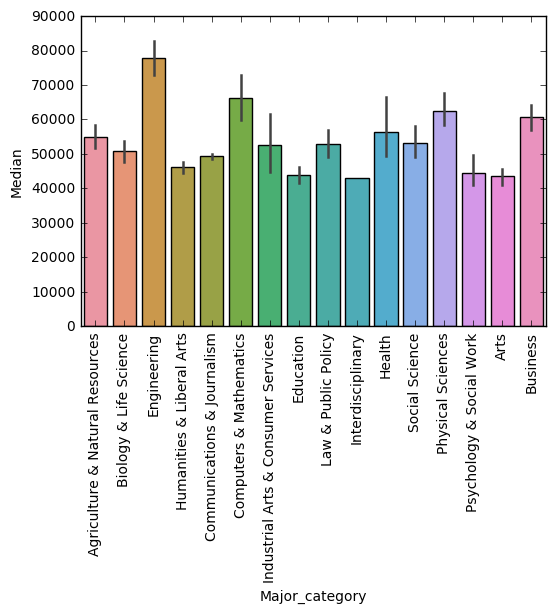

In [207]:
sns.barplot(x="Major_category",y="Median",data = majors);
plt.xticks(rotation= "vertical");

### 9. What are the top 10 most UNemployed majors?

In [208]:
d3 = majors.groupby(by="Major").Unemployed.sum()
d3.sort_values(ascending = False).head(10)

Major
BUSINESS MANAGEMENT AND ADMINISTRATION    147261
GENERAL BUSINESS                           85626
PSYCHOLOGY                                 79066
ACCOUNTING                                 75379
COMMUNICATIONS                             54390
ENGLISH LANGUAGE AND LITERATURE            52248
MARKETING AND MARKETING RESEARCH           51839
POLITICAL SCIENCE AND GOVERNMENT           40376
GENERAL EDUCATION                          38742
BIOLOGY                                    36757
Name: Unemployed, dtype: int64

### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [209]:
d32 = majors.groupby(by="Major_category").Unemployed.mean()
d32.sort_values(ascending = False).head(10)

Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

## Section 3: FIFA Soccer Game data

In [210]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [216]:
fifa.columns = fifa.columns.str.lower()

In [221]:
fifa.set_index("name",inplace = True)

In [222]:
cols_f = ["national_position","national_kit","club_kit","club_joining","contract_expiry"]
fifa.drop(cols_f,axis=1,inplace=True)

In [224]:
fifa.head()

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,long_shots,curve,freekick_accuracy,penalties,volleys,gk_positioning,gk_diving,gk_kicking,gk_handling,gk_reflexes
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,...,90,81,76,85,88,14,7,15,11,11
Lionel Messi,Argentina,FC Barcelona,RW,93,170 cm,72 kg,Left,06/24/1987,29,RW,...,88,89,90,74,85,14,6,15,11,8
Neymar,Brazil,FC Barcelona,LW,92,174 cm,68 kg,Right,02/05/1992,25,LW,...,77,79,84,81,83,15,9,15,9,11
Luis Suárez,Uruguay,FC Barcelona,ST,92,182 cm,85 kg,Right,01/24/1987,30,ST,...,86,86,84,85,88,33,27,31,25,37
Manuel Neuer,Germany,FC Bayern,GK,92,193 cm,92 kg,Right,03/27/1986,31,GK,...,16,14,11,47,11,91,89,95,90,89


In [231]:
fifa[fifa.club_position != "GK"];

In [232]:
fifa.columns

Index(['nationality', 'club', 'club_position', 'rating', 'height', 'weight',
       'preffered_foot', 'birth_date', 'age', 'preffered_position',
       'work_rate', 'weak_foot', 'skill_moves', 'ball_control', 'dribbling',
       'marking', 'sliding_tackle', 'standing_tackle', 'aggression',
       'reactions', 'attacking_position', 'interceptions', 'vision',
       'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration',
       'speed', 'stamina', 'strength', 'balance', 'agility', 'jumping',
       'heading', 'shot_power', 'finishing', 'long_shots', 'curve',
       'freekick_accuracy', 'penalties', 'volleys', 'gk_positioning',
       'gk_diving', 'gk_kicking', 'gk_handling', 'gk_reflexes'],
      dtype='object')

In [236]:
cols_f2 = [c for c in fifa.columns if c.lower()[:2] != 'gk']
fifa = fifa[cols_f2]

In [237]:
fifa[fifa.rating > 70];

In [243]:
fifa['height'] = fifa['height'].astype(str).str[0:-2]
fifa['height'] = fifa['height'].astype(float)

In [244]:
fifa['weight'] = fifa['weight'].astype(str).str[0:-2]
fifa['weight'] = fifa['weight'].astype(float)

In [250]:
fifa.isnull().sum()

nationality           0
club                  0
club_position         1
rating                0
height                0
weight                0
preffered_foot        0
birth_date            0
age                   0
preffered_position    0
work_rate             0
weak_foot             0
skill_moves           0
ball_control          0
dribbling             0
marking               0
sliding_tackle        0
standing_tackle       0
aggression            0
reactions             0
attacking_position    0
interceptions         0
vision                0
composure             0
crossing              0
short_pass            0
long_pass             0
acceleration          0
speed                 0
stamina               0
strength              0
balance               0
agility               0
jumping               0
heading               0
shot_power            0
finishing             0
long_shots            0
curve                 0
freekick_accuracy     0
penalties             0
volleys         

In [251]:
fifa.dropna(axis = 0,inplace =  True)

In [253]:
fifa.isnull().sum().sum()

0

In [254]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17587 entries, Cristiano Ronaldo to Barry Richardson
Data columns (total 42 columns):
nationality           17587 non-null object
club                  17587 non-null object
club_position         17587 non-null object
rating                17587 non-null int64
height                17587 non-null float64
weight                17587 non-null float64
preffered_foot        17587 non-null object
birth_date            17587 non-null object
age                   17587 non-null int64
preffered_position    17587 non-null object
work_rate             17587 non-null object
weak_foot             17587 non-null int64
skill_moves           17587 non-null int64
ball_control          17587 non-null int64
dribbling             17587 non-null int64
marking               17587 non-null int64
sliding_tackle        17587 non-null int64
standing_tackle       17587 non-null int64
aggression            17587 non-null int64
reactions             17587 non-null int6

### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [256]:
fifa.columns

Index(['nationality', 'club', 'club_position', 'rating', 'height', 'weight',
       'preffered_foot', 'birth_date', 'age', 'preffered_position',
       'work_rate', 'weak_foot', 'skill_moves', 'ball_control', 'dribbling',
       'marking', 'sliding_tackle', 'standing_tackle', 'aggression',
       'reactions', 'attacking_position', 'interceptions', 'vision',
       'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration',
       'speed', 'stamina', 'strength', 'balance', 'agility', 'jumping',
       'heading', 'shot_power', 'finishing', 'long_shots', 'curve',
       'freekick_accuracy', 'penalties', 'volleys'],
      dtype='object')

In [260]:
fifa.sort_values(by = "speed", ascending =False).head().index

Index(['Jonathan Biabiany', 'Anibal Chalá', 'Pierre-Emerick Aubameyang',
       'Williams', 'Mathis Bolly'],
      dtype='object', name='name')

In [261]:
fifa.sort_values(by = "marking", ascending =False).head().index

Index(['Giorgio Chiellini', 'Thiago Silva', 'Andrea Barzagli',
       'Jérôme Boateng', 'Miranda'],
      dtype='object', name='name')

In [262]:
fifa.sort_values(by = "finishing", ascending =False).head().index

Index(['Lionel Messi', 'Luis Suárez', 'Cristiano Ronaldo', 'Gonzalo Higuaín',
       'Robert Lewandowski'],
      dtype='object', name='name')

### 3. Who is the tallest French lefted foot player?

In [268]:
#fifa.nationality.unique()

In [269]:
#height - max
#nationality - France
#preffered_foot - Left
#fifa.apply(lambda x: )
f3 = fifa.sort_values(by = "height", ascending =False)


In [276]:
f4 = f3[(f3.nationality == "France") & (f3.preffered_foot == "Left")].head(1);
f4.index

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Lucas Mocio,France,Olym. Lyonnais,Sub,63,197.0,85.0,Left,05/11/1994,22,GK,...,39,63,17,23,21,15,19,12,17,20


### 4. Show a pandas series of every attribute's correlation with the rating attribute

In [295]:
fifa.corr().rating

rating                1.000000
height                0.046937
weight                0.139703
age                   0.458098
weak_foot             0.226263
skill_moves           0.251926
ball_control          0.463211
dribbling             0.368565
marking               0.236843
sliding_tackle        0.215385
standing_tackle       0.249156
aggression            0.404422
reactions             0.828329
attacking_position    0.354501
interceptions         0.319504
vision                0.489277
composure             0.613612
crossing              0.401851
short_pass            0.496239
long_pass             0.483217
acceleration          0.206392
speed                 0.224253
stamina               0.355335
strength              0.369045
balance               0.087811
agility               0.283309
jumping               0.289840
heading               0.343265
shot_power            0.441773
finishing             0.328576
long_shots            0.419517
curve                 0.420796
freekick

### 5. Make a heatmap of the dataset's correlation table

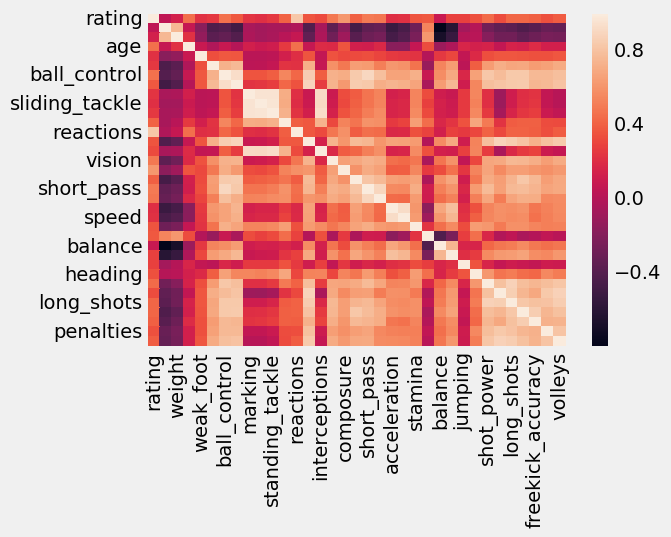

In [300]:
plt.style.use("fivethirtyeight")
sns.heatmap(fifa.corr()); 

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [302]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [311]:
fifa2 = fifa[fifa["club"].isin(clubs_list)]

In [312]:
fifa2.head()

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185.0,80.0,Right,02/05/1985,32,LW/ST,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,FC Barcelona,RW,93,170.0,72.0,Left,06/24/1987,29,RW,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,FC Barcelona,LW,92,174.0,68.0,Right,02/05/1992,25,LW,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,85.0,Right,01/24/1987,30,ST,...,86,69,77,87,94,86,86,84,85,88
Manuel Neuer,Germany,FC Bayern,GK,92,193.0,92.0,Right,03/27/1986,31,GK,...,52,78,25,25,13,16,14,11,47,11


### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

In [313]:
fifa.columns

Index(['nationality', 'club', 'club_position', 'rating', 'height', 'weight',
       'preffered_foot', 'birth_date', 'age', 'preffered_position',
       'work_rate', 'weak_foot', 'skill_moves', 'ball_control', 'dribbling',
       'marking', 'sliding_tackle', 'standing_tackle', 'aggression',
       'reactions', 'attacking_position', 'interceptions', 'vision',
       'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration',
       'speed', 'stamina', 'strength', 'balance', 'agility', 'jumping',
       'heading', 'shot_power', 'finishing', 'long_shots', 'curve',
       'freekick_accuracy', 'penalties', 'volleys'],
      dtype='object')

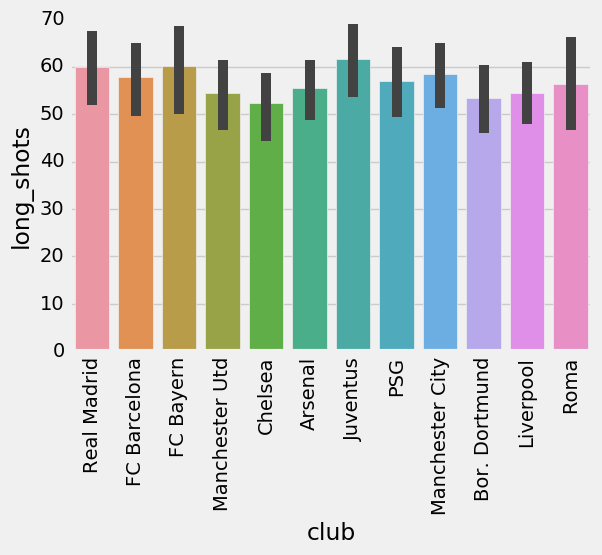

In [320]:
#long_shots
#curve
#dribbling
cols2 = ["long_shots","curve","dribbling"]
sns.barplot(x = "club",y="long_shots", data = fifa2);
plt.xticks(rotation= "vertical");

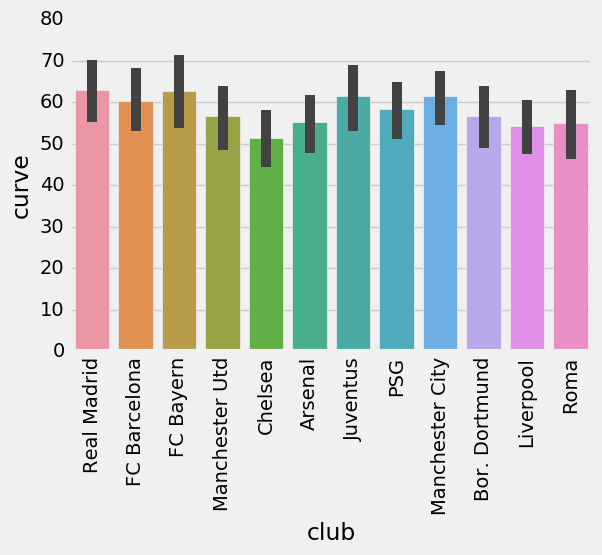

In [321]:
sns.barplot(x = "club",y="curve", data = fifa2);
plt.xticks(rotation= "vertical");

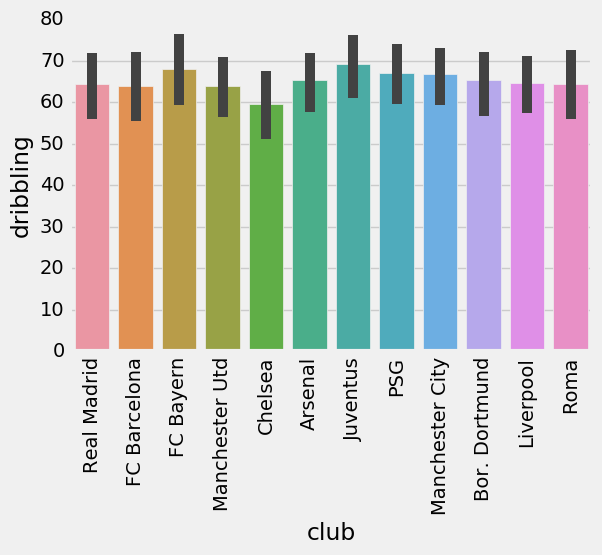

In [322]:
sns.barplot(x = "club",y="dribbling", data = fifa2);
plt.xticks(rotation= "vertical");

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

In [323]:
fifa2.short_pass.head()

name
Cristiano Ronaldo    83
Lionel Messi         88
Neymar               81
Luis Suárez          83
Manuel Neuer         55
Name: short_pass, dtype: int64

In [326]:
fifa2.preffered_foot.unique()

array(['Right', 'Left'], dtype=object)

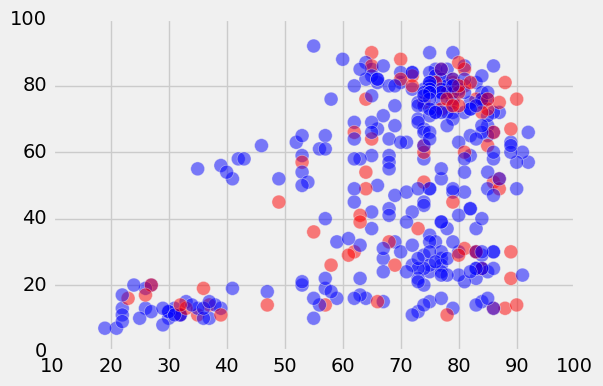

In [328]:
colors = fifa.preffered_foot.map({"Right":"blue", "Left": "red"})
plt.scatter(fifa2.short_pass, fifa2.marking, s = 100, alpha = 0.5,c=colors);

### 9. Make a grouped boxplots using club_position as the x axis for the following attributes: dribbling, balance, and sliding_tackle

In [ ]:
#Dribbling boxplot

Which position is better at dribbling? ST or RCM? Why?

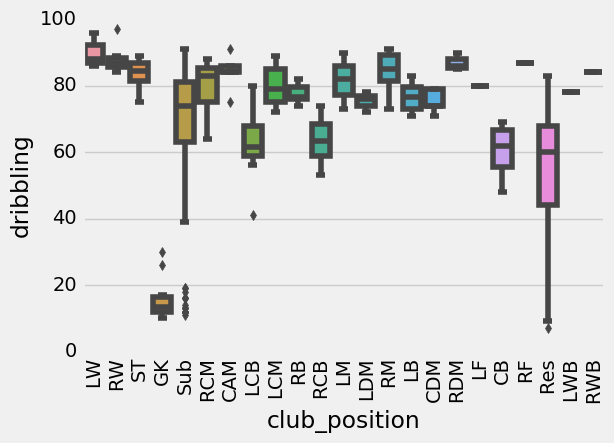

In [330]:
sns.boxplot(x = "club_position",y="dribbling", data = fifa2);
plt.xticks(rotation= "vertical");

In [ ]:
#Balance boxplot

Which position is better at balance? LM or LDM? Why?

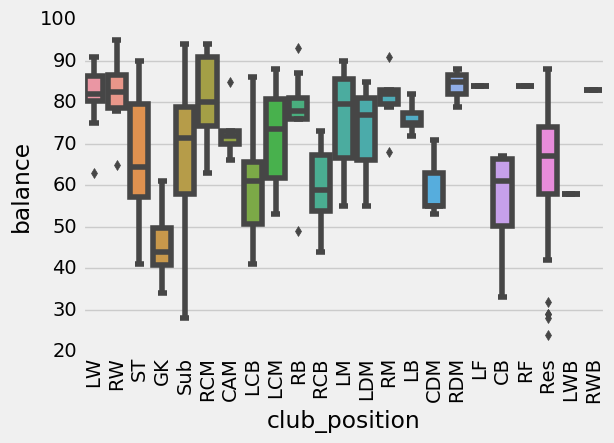

In [333]:
sns.boxplot(x = "club_position",y="balance", data = fifa2);
plt.xticks(rotation= "vertical");

In [ ]:
#sliding_tackle boxplot

What is the IQR for positions ST, RB, and RM?

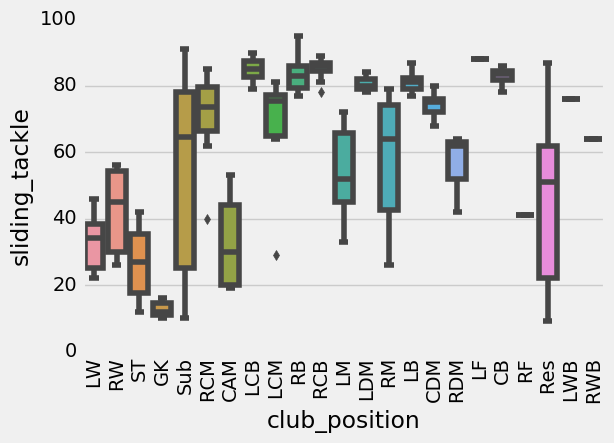

In [334]:
sns.boxplot(x = "club_position",y="sliding_tackle", data = fifa2);
plt.xticks(rotation= "vertical");